<a href="https://colab.research.google.com/github/lgiesen/forest_height/blob/main/notebooks/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import drive
drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [67]:
# the zipped data is uploaded in the root_path folder
root_path = 'drive/MyDrive/Colab Notebooks/data/'
path_images = f'{root_path}images/'
path_masks = f'{root_path}masks/'
user = "lgiesen"
repo = "forest_height"
!git clone https://github.com/{user}/{repo}.git

fatal: destination path 'forest_height' already exists and is not an empty directory.


In [68]:
%run /content/forest_height/src/load_data.py
%run /content/forest_height/src/evaluate_model.py

<Figure size 640x480 with 0 Axes>

Fit Model on Color Channels and NDVI

In [84]:
from sklearn.ensemble import RandomForestRegressor
X_train, y_train, X_test, y_test = load_data("color_channels_ndvi")
# initialize model
rf = RandomForestRegressor(random_state=42)
# train model
rf.fit(X_train, y_train)
# predict test set
y_pred = rf.predict(X_test)
mae_color_channels_ndvi, mse_color_channels_ndvi, rmse_color_channels_ndvi, mape_color_channels_ndvi = evaluate_model(y_test, y_pred)

MAE: 10.450072236026703; MSE: 152.5827937802089; RMSE: 3.2326571479243977; MAPE: 1.3046686151539104


### Feature Importance

Feature: 0, Score: 0.06925
Feature: 1, Score: 0.09639
Feature: 2, Score: 0.09280
Feature: 3, Score: 0.06651
Feature: 4, Score: 0.09093
Feature: 5, Score: 0.05885
Feature: 6, Score: 0.07522
Feature: 7, Score: 0.06545
Feature: 8, Score: 0.10803
Feature: 9, Score: 0.07313
Feature: 10, Score: 0.20344


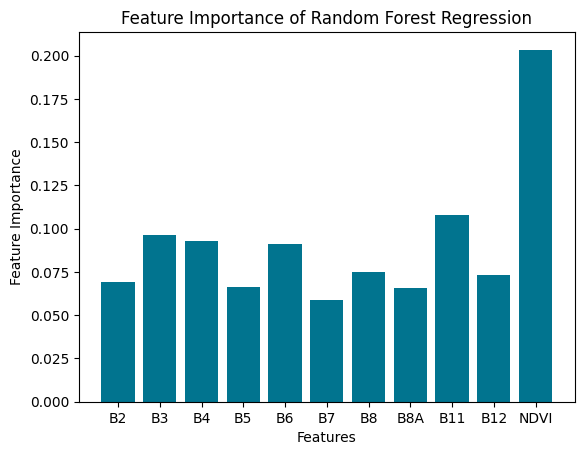

In [71]:
import matplotlib.pyplot as plt
# get importance
# importance = rf_random.coef_
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12', 'NDVI'], importance, color="#01748F")
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance of Random Forest Regression")
plt.show()

As visualized in the bar graph, the NDVI channel value is the most significant one.

RMSE: 12.252092643312652


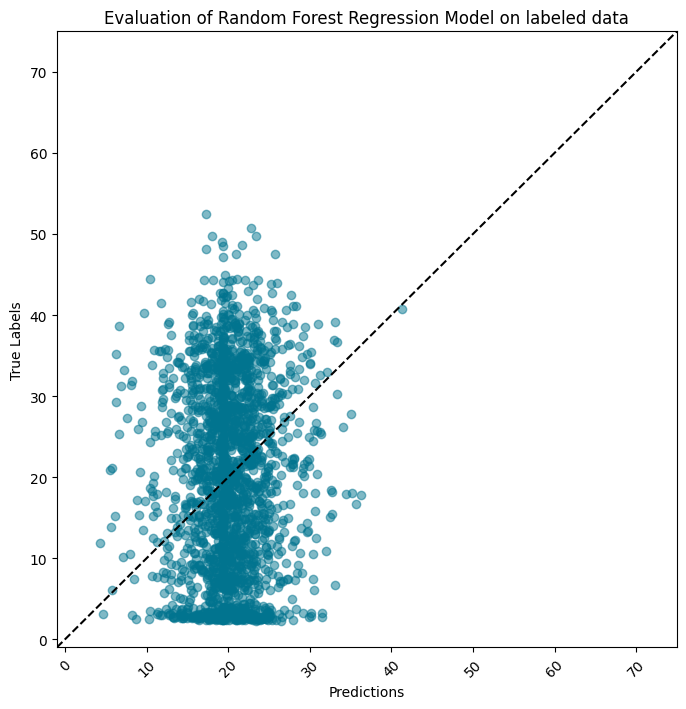

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

from sklearn.metrics import mean_squared_error

# compute RMSE
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

# visualize predictions vs. true labels
fig = plt.figure(figsize=(8,8))
plt.scatter(y_pred, y_test, color="#01748F", alpha=0.5)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.plot([-1,75], [-1, 75], 'k--')
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.xlim([-1,75])
plt.ylim([-1,75])
plt.title("Evaluation of Random Forest Regression Model on Labeled Data")
plt.show()

The random forest regression are scattered around the average dataset tree height of ~18m. It does not seem to perform well for lower or higher tree heights and is unable to predict large or very small trees.

Fit Model on NDVI

In [85]:
X_train, y_train, X_test, y_test = load_data("ndvi")
#reshape
X_train, X_test = X_train.reshape(-1,1), X_test.reshape(-1,1)
# initialize model
rf_ndvi = RandomForestRegressor(random_state=42)
# train model
rf_ndvi.fit(X_train, y_train)
# predict test set
y_pred = rf_ndvi.predict(X_test)
mae_ndvi, mse_ndvi, rmse_ndvi, mape_ndvi = evaluate_model(y_test, y_pred)

MAE: 10.83361410394242; MSE: 165.3802201289557; RMSE: 3.2914455948629047; MAPE: 1.288705239750867


Fit Model on Color Channels

In [86]:
load_data("color_channels")
# initialize model
rf_color_channels = RandomForestRegressor(random_state=42)
# train model
rf_color_channels.fit(X_train, y_train)
# predict test set
y_pred = rf_color_channels.predict(X_test)
mae_color_channels, mse_color_channels, rmse_color_channels, mape_color_channels = evaluate_model(y_test, y_pred)

MAE: 10.83361410394242; MSE: 165.3802201289557; RMSE: 3.2914455948629047; MAPE: 1.288705239750867


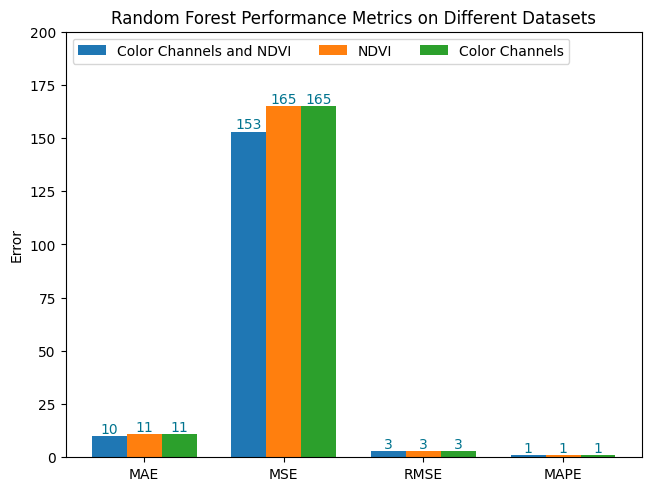

In [87]:
group = ("MAE", "MSE", "RMSE", "MAPE")
errors = {
    'Color Channels and NDVI': (mae_color_channels_ndvi, mse_color_channels_ndvi, rmse_color_channels_ndvi, mape_color_channels_ndvi),
    'NDVI': (mae_ndvi, mse_ndvi, rmse_ndvi, mape_ndvi),
    'Color Channels': (mae_color_channels, mse_color_channels, rmse_color_channels, mape_color_channels),
}

x = np.arange(len(group))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in errors.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, np.round(measurement), width, label=attribute)
    ax.bar_label(rects, padding=0, color="#01748F")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error')
ax.set_title('Random Forest Performance Metrics on Different Datasets')
ax.set_xticks(x + width, group)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 200)

plt.show()

Random Forest performs similarly on every dataset. It is worth noting that color channels and NDVI combined yield slightly better results than the rest.

### Random Search

In [ ]:
X_train, y_train, X_test, y_test = load_data("ndvi")
#reshape
X_train, X_test = X_train.reshape(-1,1), X_test.reshape(-1,1)
# initialize model
rf_ndvi = RandomForestRegressor(random_state=42)
# train model
rf_ndvi.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
import numpy as np
# Number of trees in random forest
n_estimators = [100, 300, 500] #[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': ['absolute_error'],
               'bootstrap': bootstrap}

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# initialize model
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    # scoring="neg_mean_absolute_error", # strategy to evaluate the performance
    n_iter=100,
    cv=3, # k-fold cross-validation
    verbose=2, # the higher, the more messages
    random_state=42,
    #n_jobs=-1, # use all processors
    return_train_score=True)

# train model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, criterion=absolute_error, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 3.2min
[CV] END bootstrap=False, criterion=absolute_error, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 4.4min
[CV] END bootstrap=False, criterion=absolute_error, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 3.7min
[CV] END bootstrap=True, criterion=absolute_error, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  20.4s
[CV] END bootstrap=True, criterion=absolute_error, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  23.7s
[CV] END bootstrap=True, criterion=absolute_error, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_spl

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['absolute_error'],
                                        'max_depth': [1, 25, 50, 75, 100],
                                        'max_features': ['log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, return_train_score=True, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 1,
 'criterion': 'absolute_error',
 'bootstrap': True}

Save model

In [88]:
# initialize model
rf_random = RandomForestRegressor(random_state=42)
# train model
rf_random.fit(X_train, y_train)
# predict test set
y_pred = rf_random.predict(X_test)
mae_color_channels_nvdi, mse_color_channels_nvdi, rmse_color_channels_nvdi, mape_color_channels_nvdi = evaluate_model(y_test, y_pred)

MAE: 10.83361410394242; MSE: 165.3802201289557; RMSE: 3.2914455948629047; MAPE: 1.288705239750867


In [89]:
rf_random = joblib.load("forest_height/models/random_forest_random_search_10.02.joblib")

In [90]:
X_train, y_train, X_test, y_test = load_data("ndvi")
#reshape
X_train, X_test = X_train.reshape(-1,1), X_test.reshape(-1,1)
# predict test set
y_pred = rf_random.predict(X_test)
mae_color_channels_nvdi, mse_color_channels_nvdi, rmse_color_channels_nvdi, mape_color_channels_nvdi = evaluate_model(y_test, y_pred)

MAE: 10.021537493308648; MSE: 136.5169536595948; RMSE: 3.165681205255616; MAPE: 1.2434139977359764


In [91]:
import joblib
%cd forest_height/models
# save model
joblib.dump(rf_random, f'random_forest_random_search_NDVI_{round(mae_color_channels_nvdi, 2)}.joblib')
# load model with:
%cd ../../
# rf_random = joblib.load("forest_height/models/random_forest_random_search_NDVI_10.02.joblib")

/content/forest_height/models
/content


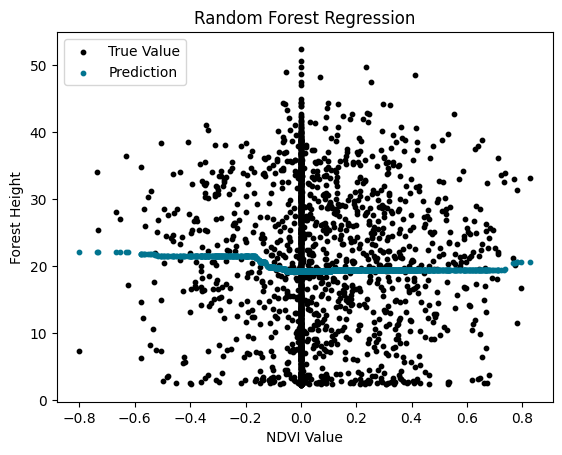

In [93]:
from matplotlib import pyplot as plt
# only the NDVI channel is plotted on the x-axis
# because 11-dimensional data cannot be visualized for humans
fig, ax = plt.subplots()
plt.scatter(X_test, y_test, 10, color = 'black')
plt.scatter(X_test, y_pred, 10, color = '#01748F')
plt.title('Random Forest Regression')
plt.xlabel('NDVI Value')
plt.ylabel('Forest Height')
ax.legend(("True Value", "Prediction"), loc='upper left')
plt.show()

Visualize prediction

In [ ]:
%run forest_height/src/visualize_data.py

In [ ]:
plot(y_pred[0])
plot(X_test[0])

In [ ]:
#### load model
#### predict X (maybe load data)
#### del variables